# Optimization

In this Notebook we are going to load the Disease model, execute and find the parameters that maximize economic output.

- To load and run the Vensim model we use PySD library, please check the following tutorial before continuing: https://pysd.readthedocs.io/en/master/basic_usage.html#
- Model run's output are Pandas Data Frames, please refer to the Pandas documentation if you need additional insights and supported data operations: https://pandas.pydata.org/pandas-docs/stable/user_guide/index.html#user-guide. 
There is also a 10min tutorial available that might be of your interest: https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html
- We implemented the plots using matplotlib, if you need additional information please refer to the examples in canvas at "Pre-requisites->Computer Installations->Python and useful packages to explore". You may also refer to the following documentation: https://matplotlib.org/stable/contents.html

In [1]:
%pip install pysd==3.7.1 -q
%pip install netCDF4==1.6.1 -q

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [25 lines of output]
      reading from setup.cfg...
      
          HDF5_DIR environment variable not set, checking some standard locations ..
      checking C:\Users\dimcp\Anaconda3\include ...
      hdf5 headers not found in C:\Users\dimcp\Anaconda3\include
      checking C:\Users\dimcp\Anaconda3\Library\include ...
      HDF5 library version: 1.10.6 headers found in C:\Users\dimcp\Anaconda3\Library\include
      HDF5 library version: 1.10.6 found in C:\Users\dimcp\Anaconda3\Library
      
      NETCDF4_DIR environment variable not set, checking standard locations..
      checking C:\Users\dimcp\Anaconda3 ...
      checking C:\Users\dimcp\Anaconda3\Library ...
      checking C:\Users\dimcp ...
      checking /usr/local ...
      checking /sw ...
      checking /opt ...
      checking /opt/local ...
      checking /opt/homebrew ...
      checking /usr ...
      Trac

In [1]:
import pysd
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import scipy as sp
from scipy.interpolate import UnivariateSpline


In [9]:
# load the Vensim model into Python
model = pysd.read_vensim(r"SFD_Group.mdl")

In [3]:
soildata = pd.read_csv(r"C:\Users\dimcp\Documents\UvA\MSD\Assignment_2\soildata.csv",delimiter=";",header=None,names=['time','Original Bacteria'])
# Convert 'Bacteria' column to numeric, replacing commas with dots
soildata['Original Bacteria'] = pd.to_numeric(soildata['Original Bacteria'].str.replace(',', '.'))

soildata['Original Bacteria']= soildata['Original Bacteria']*1e6
soildata

,time,Original Bacteria
0,0,100000000.0
1,1,117750000.0
2,2,137070000.0
3,3,161650000.0
4,4,187680000.0
...,...,...
56,56,924250000.0
57,57,927340000.0
58,58,920800000.0
59,59,921030000.0


In [10]:
# run the model with default parameter values
model_output = model.run()
model_output.head(5)

,FINAL TIME,INITIAL TIME,SAVEPER,TIME STEP,Marriage rate,Delay for societal,Societal factor,Population,Delay for recovery,Divorce,...,Economic factor,Unmarried,K,Marriage,Married,Recovery rate,Divorce rate,Education,W eco,W soc
0.000,60,0,0.125,0.125,0.117999,1.2,0.606669,330.0,3,31.835990,...,0.53333,47.000000,1,5.545962,140.000000,0.3,0.227400,0.9,0.33,0.33
0.125,60,0,0.125,0.125,0.117999,1.2,0.606669,330.0,3,31.088696,...,0.53333,51.669255,1,6.096930,136.713746,0.3,0.227400,0.9,0.33,0.33
0.250,60,0,0.125,0.125,0.118030,1.2,0.606565,330.0,3,30.376774,...,0.53333,56.269638,1,6.641531,133.589776,0.3,0.227388,0.9,0.33,0.33
0.375,60,0,0.125,0.125,0.118092,1.2,0.606360,330.0,3,29.699193,...,0.53333,60.799786,1,7.179961,130.622870,0.3,0.227366,0.9,0.33,0.33
0.500,60,0,0.125,0.125,0.118182,1.2,0.606059,330.0,3,29.054942,...,0.53333,65.258252,1,7.712370,127.807966,0.3,0.227333,0.9,0.33,0.33


In [11]:
# list all stocks, variables and parameters of the model
list(model_output)

['FINAL TIME',
 'INITIAL TIME',
 'SAVEPER',
 'TIME STEP',
 'Marriage rate',
 'Delay for societal',
 'Societal factor',
 'Population',
 'Delay for recovery',
 'Divorce',
 'Recovery',
 'Divorced',
 'Economic factor',
 'Unmarried',
 'K',
 'Marriage',
 'Married',
 'Recovery rate',
 'Divorce rate',
 'Education',
 'W eco',
 'W soc']

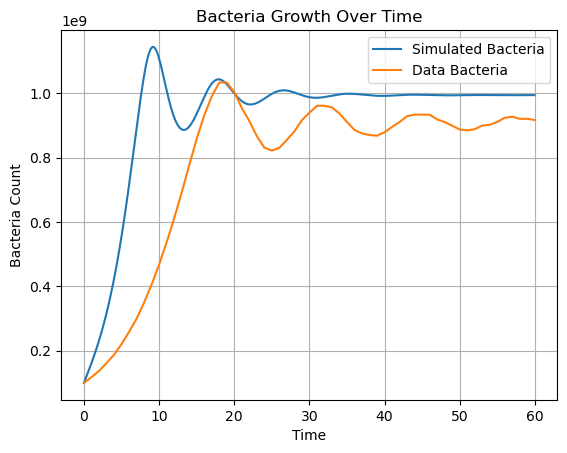

In [6]:
# plots
fig, ax = plt.subplots()
model_output = model.run(params={'Initial Nutrient concentration':5,
                                 'Maximum':1},
                         return_timestamps=np.arange(0, 60, 0.05),
                         return_columns=['Bacteria'])#params={'Initial Nutrient concentration': 2.360679774997897},
ax.plot(model_output,label='Simulated Bacteria')
ax.plot(soildata['time'], soildata['Original Bacteria'],label='Data Bacteria') # marker is optional
plt.title('Bacteria Growth Over Time')
plt.xlabel('Time')
plt.ylabel('Bacteria Count')
ax.legend()
plt.grid(True)
plt.show()

### 3.5


In [98]:
# vary the communication strength and observe its impact on economic activity
observable1 = 'Bacteria'
observable2 = 'Nutrients'
parameter1 = 'Initial Nutrient concentration'
parameter1_range = np.arange(0, 10, 0.1)
timetocapture = 60

# lists to store output values
parameter1_values = []
observable1_values = []
observable2_values = []

# go through all values of parameter 1
for parameter1_value in parameter1_range:
    
    # this can be adjusted to achieve more repetitions
    for i in range(0,100,1):

        # run the model at the given value for parameter 1
        result = model.run(params={parameter1: parameter1_value}, 
                           return_timestamps=[timetocapture],
                           return_columns=[observable1,observable2])

        # store results
        parameter1_values.append(parameter1_value)
        observable1_values.append(result.loc[timetocapture, observable1])
        
        observable2_values.append(result.loc[timetocapture, observable2])

# collect results in a DataFrame
output = pd.DataFrame({parameter1: parameter1_values, observable1: observable1_values, observable2: observable2_values})

In [95]:
parameter1_df = output[parameter1].drop_duplicates()
parameter1_df

0       0.0
100     0.1
200     0.2
300     0.3
400     0.4
       ... 
9500    9.5
9600    9.6
9700    9.7
9800    9.8
9900    9.9
Name: Initial Nutrient concentration, Length: 100, dtype: float64

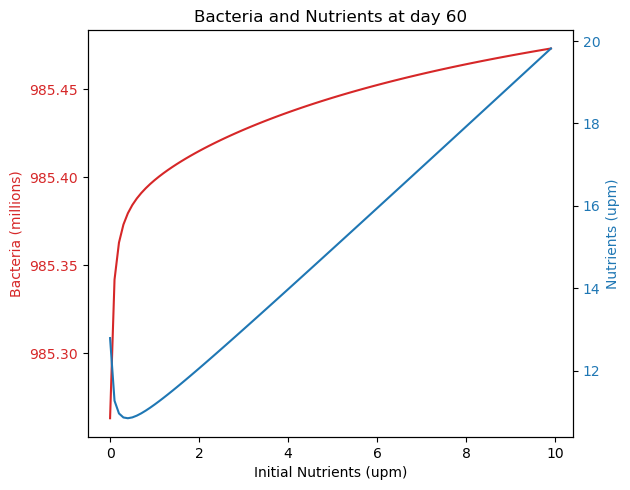

In [100]:
# plot the observable as a function of the parameter values
# output.groupby(parameter1).mean().plot()

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Initial Nutrients (upm)')
ax1.set_ylabel('Bacteria (millions)', color=color)
ax1.plot(parameter1_df, output.groupby(parameter1)[observable1].mean()/1e6, color=color) #
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Nutrients (upm)', color=color)  # we already handled the x-label with ax1
ax2.plot(parameter1_df,  output.groupby(parameter1)[observable2].mean(), color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title("Bacteria and Nutrients at day 60")
plt.show()

## 3.6 Optimization


### Minimise mean squared error

In [15]:
def error(param_list):
    #unpack the parameter list
    initial_nutrient_concentration, maximum = param_list
    #run the model with the new parameters, returning the info we're interested in

    
    result = model.run(params={'Initial Nutrient concentration':initial_nutrient_concentration,
                               'Maximum':maximum},
                       return_columns=['Bacteria'],
                       return_timestamps=list(soildata.index.values))
    #return the sum of the squared errors
    return sum((result['Bacteria'] - soildata['Original Bacteria'])**2)

In [24]:
initial_nutrient_concentration_guess = 0.4
maxi_guess = 0.5

initial_nutrient_concentration_bounds = (0, 10)
maxi_bounds = (0, 1)

In [ ]:

res = sp.optimize.minimize(error, [initial_nutrient_concentration_guess,
                                      maxi_guess],
                              method='L-BFGS-B', # 'SLSQP'
                              bounds=[initial_nutrient_concentration_bounds,
                                      maxi_bounds])
res.x

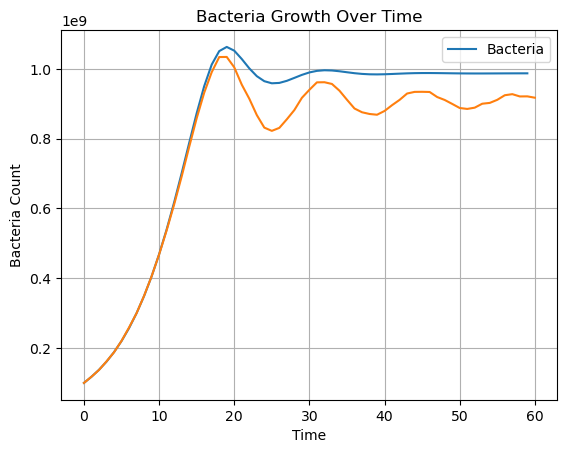

In [121]:
model_output = model.run(params={'Initial Nutrient concentration': res.x[0],
                                 'Maximum': res.x[1]},
                         return_timestamps=np.arange(0, 60, 1),
                         return_columns=['Bacteria'])#params={'Initial Nutrient concentration': 2.360679774997897},
model_output.plot()
plt.plot(soildata['time'], soildata['Bacteria']) # marker is optional
plt.title('Bacteria Growth Over Time')
plt.xlabel('Time')
plt.ylabel('Bacteria Count')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
# plt.grid(True)
# plt.ylabel('Bacteria')
# plt.xlabel('time (days)')
plt.grid(True)
plt.show()

In [5]:
# Different version of the above
observable = 'Bacteria'
parameter1 = 'Initial Nutrient concentration'
parameter2 = 'Maximum'
timetocapture = 10

def observable_neg(param_list):
    '''
    This function returns the negated mean squared error between the model's
    predicted bacteria values and the actual bacteria data from soildata,
    given the values of two parameters in param_list.
    '''

    # unpack the parameter list
    initial_nutrient_concentration, maximum = param_list

    # create a list to store the observable values in
    observable_values = []


    # adjust this to change the number of repetitions
    for i in np.arange(0, 1, 1):

        
        
        result = model.run(params={'Initial Nutrient concentration':initial_nutrient_concentration,
                                'Maximum':maximum},
                        return_columns=['Bacteria'],
                        return_timestamps=list(soildata.index.values))
        
        #return the sum of the squared errors
        squared_error = sum((result['Bacteria'] - soildata['Original Bacteria'])**2)

            # Store the squared error
        observable_values.append(squared_error)

        # return the negated average of the MSE values
    return np.mean(observable_values)

In [10]:
initial_nutrient_concentration_guess = 0.4
maxi_guess = 0.3

initial_nutrient_concentration_bounds = (0, 10)
maxi_bounds = (0, 1)

In [ ]:
#run for one guess
res = sp.optimize.minimize(observable_neg,
                                   x0=[initial_nutrient_concentration_guess, maxi_guess],
                                   method='L-BFGS-B',
                                   bounds=[initial_nutrient_concentration_bounds, maxi_bounds])
res

In [89]:
### find value of parameter 1,2 that maximises the observable - All guesses (grid)
parameter1_vals = []
parameter2_vals = []
res_vals = []
parameter1_bounds = (0, 10)
parameter2_bounds = (0, 1)

for param1_val in np.arange(0, 12, 2):
     for param2_val in np.arange(0, 1.2, 0.2):

          # we need an initial guess an bounds for both parameters
          parameter1_guess = param1_val
          

          parameter2_guess = param2_val
          

          res = sp.optimize.minimize(observable_neg,
                                   x0=[parameter1_guess, parameter2_guess],
                                   method='L-BFGS-B',
                                   bounds=[parameter1_bounds, parameter2_bounds])
          
          # store results
          parameter1_vals.append(param1_val)
          parameter2_vals.append(param2_val)
          res_vals.append(res)
          print("Run with parameters: ",param1_val,"and: ",param2_val,". Got res.x=",res.x," and fun= ",res.fun)#




Run with parameters:  0 and:  0.0 . Got res.x= [5.01208160e-23 3.93597376e-01]  and fun=  2.337691343620566e+18
Run with parameters:  0 and:  0.2 . Got res.x= [0.  0.2]  and fun=  7.616024820918682e+18
Run with parameters:  0 and:  0.4 . Got res.x= [0.  0.4]  and fun=  3.008732579992379e+18
Run with parameters:  0 and:  0.6000000000000001 . Got res.x= [7.11433635e-06 5.99999851e-01]  and fun=  2.507497592216079e+18
Run with parameters:  0 and:  0.8 . Got res.x= [7.90623945e-06 7.99999368e-01]  and fun=  3.2070551325705494e+26
Run with parameters:  0 and:  1.0 . Got res.x= [3.35292994e-06 9.99999665e-01]  and fun=  6.68541346528335e+30
Run with parameters:  2 and:  0.0 . Got res.x= [2. 0.]  and fun=  3.4611966083784167e+19
Run with parameters:  2 and:  0.2 . Got res.x= [2.  0.2]  and fun=  2.7042997363863e+18
Run with parameters:  2 and:  0.4 . Got res.x= [2.00000336 0.39999979]  and fun=  3.37916703416701e+17
Run with parameters:  2 and:  0.6000000000000001 . Got res.x= [2.  0.6]  and 

KeyboardInterrupt: 

In [54]:
# collect results into a DataFrame
output_res = pd.DataFrame({parameter1: parameter1_vals,
                       parameter2: parameter2_vals,
                       "Results": res_vals})
output_res

,Initial Nutrient concentration,Maximum,Results
0,0,0.0,"[0.5374412230228331, 0.37111299622650806]"
1,0,0.2,"[9.999894777351836, 0.35622248097076803]"
2,0,0.4,"[0.5373427337132093, 0.37111781910211855]"
3,0,0.6,"[0.5373874525694226, 0.3711140382867953]"
4,0,0.8,"[0.5374503502370381, 0.37111282202617735]"
5,0,1.0,"[0.537442756157351, 0.371112968745663]"
6,2,0.0,"[0.5374396564294689, 0.37111305100525604]"
7,2,0.2,"[0.5374155389018676, 0.3711134724851275]"
8,2,0.4,"[0.5374233157838277, 0.37111330707965146]"
9,2,0.6,"[0.5374196689693942, 0.3711134035420033]"


In [53]:
output_res.to_csv("Calibration_results.csv",index=False)

In [55]:
#Different values because it was run on older model
res.x


array([0.53740309, 0.37111371])